# Seasonal ARIMA-models

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

jtplot.style(figsize=(15, 9))

## Seasonal decompose

In [2]:
milk = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/milk_production.csv',
                   index_col='date', parse_dates=True)
milk = milk.asfreq('MS')
milk.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


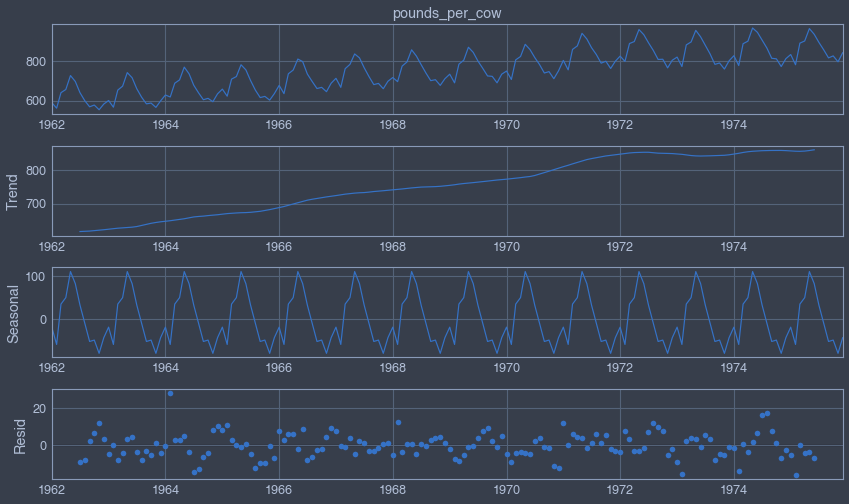

In [5]:
decomp = seasonal_decompose(milk['pounds_per_cow'])

decomp.plot();
plt.tight_layout();

## Seasonal ACF and PACF

In [6]:
water = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/water.csv',
                    index_col='date', parse_dates=True)
water = water.asfreq('MS')
water.head()

,water_consumers
date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313


<AxesSubplot:xlabel='date'>

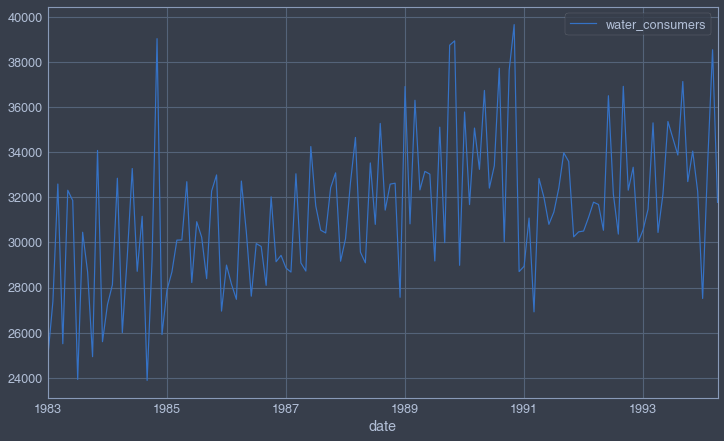

In [7]:
water.plot()

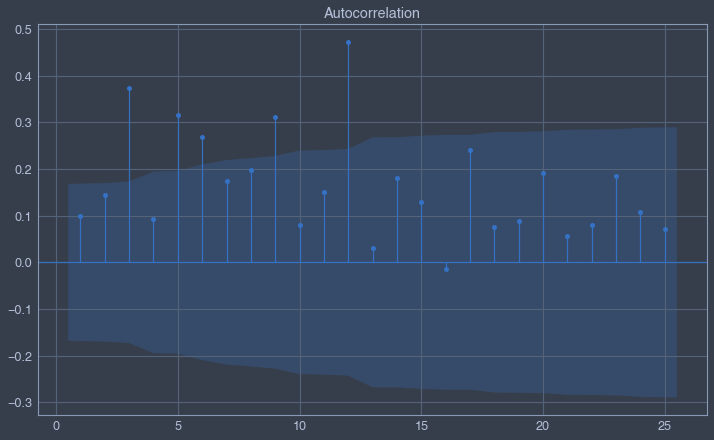

In [9]:
fig, ax = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False, ax=ax);

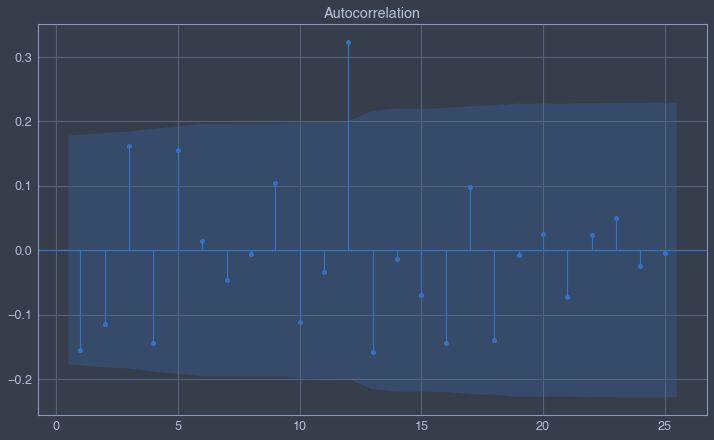

In [10]:
water_2 = water - water.rolling(15).mean()
water_2.dropna(inplace=True)

fig, ax = plt.subplots()

plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax);

## SARIMA Models

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/df1.csv',
                  index_col=0, parse_dates=True)
df2 = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/df2.csv',
                  index_col=0, parse_dates=True)
df3 = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/df3.csv',
                  index_col=0, parse_dates=True)

In [3]:
df1 = df1.asfreq('d')
df2 = df2.asfreq('d')
df3 = df3.asfreq('d')

<AxesSubplot:>

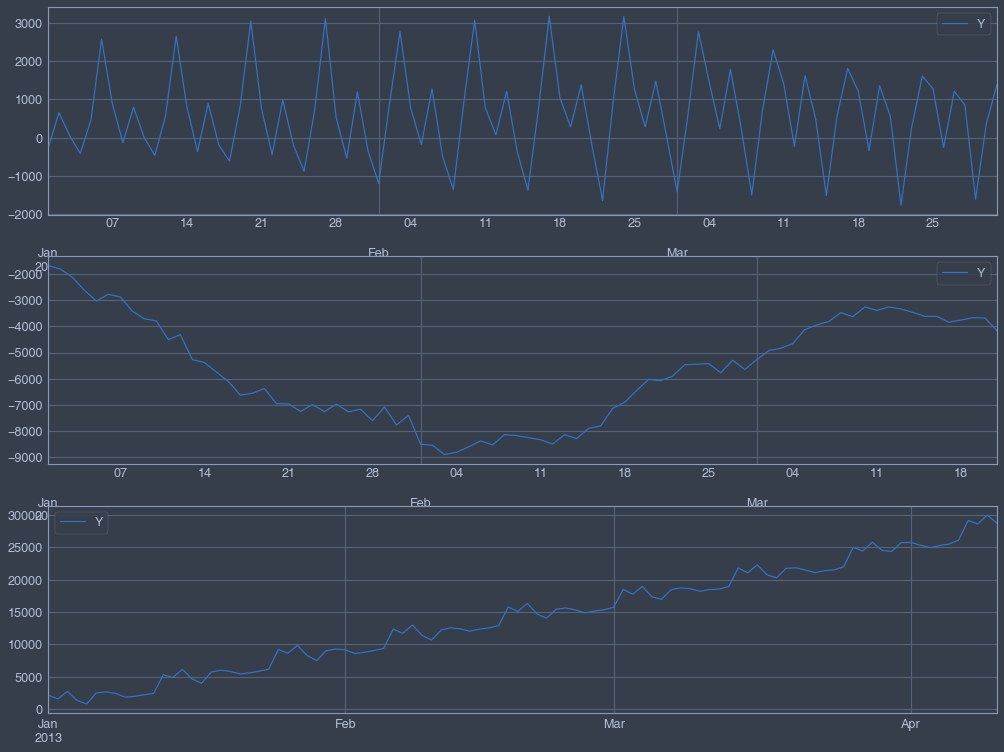

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(17, 13))
df1.plot(ax=ax[0])
df2.plot(ax=ax[1])
df3.plot(ax=ax[2])

In [5]:
model = SARIMAX(df1, order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 Y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.243
Date:                           Mon, 02 Sep 2024   AIC                           1118.486
Time:                                   20:44:04   BIC                           1125.742
Sample:                               01-01-2013   HQIC                          1121.401
                                    - 03-31-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1032      0.103      1.002      0.316      -0.099       0.305
ar.S.L7        0.2781      0.104      2.665      0.008       0.074       0.483
sigma2      3.858e+04   7224.680      5.340      0.000    2.44e+04    5.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.97   Prob(JB):                         0.43
Heteroskedasticity (H):               1.35   Skew:                            -0.15
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
model = SARIMAX(df2, order=(2, 1, 1), seasonal_order=(1, 0, 0, 4))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
Date:                            Mon, 02 Sep 2024   AIC                           1130.679
Time:                                    20:44:45   BIC                           1142.526
Sample:                                01-01-2013   HQIC                          1135.426
                                     - 03-21-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
ar.L2          0.5015      0.110      4.560      0.000       0.286       0.717
ma.L1         -0.4271      0.178     -2.401      0.016      -0.776      -0.078
ar.S.L4        0.1075      0.127      0.847      0.397      -0.141       0.356
sigma2       8.45e+04   1.63e+04      5.178      0.000    5.25e+04    1.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.95
Prob(Q):                              1.00   Prob(JB):                         0.62
Heteroskedasticity (H):               0.60   Skew:                            -0.07
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
model = SARIMAX(df3, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    Y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.376
Date:                              Mon, 02 Sep 2024   AIC                           1048.752
Time:                                      20:45:03   BIC                           1056.149
Sample:                                  01-01-2013   HQIC                          1051.730
                                       - 04-10-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4236      0.090      4.719      0.000       0.248       0.600
ma.S.L12      -0.0898      0.116     -0.776      0.438      -0.317       0.137
sigma2      9347.1462   1407.490      6.641      0.000    6588.516    1.21e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               0.77   Skew:                             0.02
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Choosing SARIMA order

In [2]:
aus_empl = pd.read_csv('https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/aus_employment.csv',
                             index_col='date', parse_dates=True)
aus_empl = aus_empl.asfreq('MS')
aus_empl.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


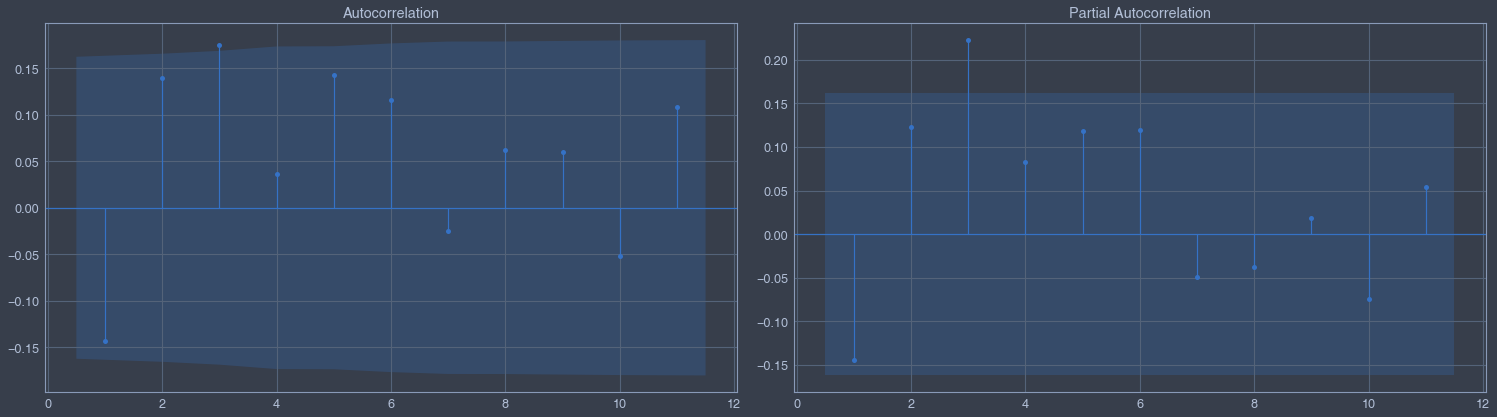

In [6]:
aus_employment_diff = aus_empl.diff().diff(12).dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 6))
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1);
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2);
plt.tight_layout();

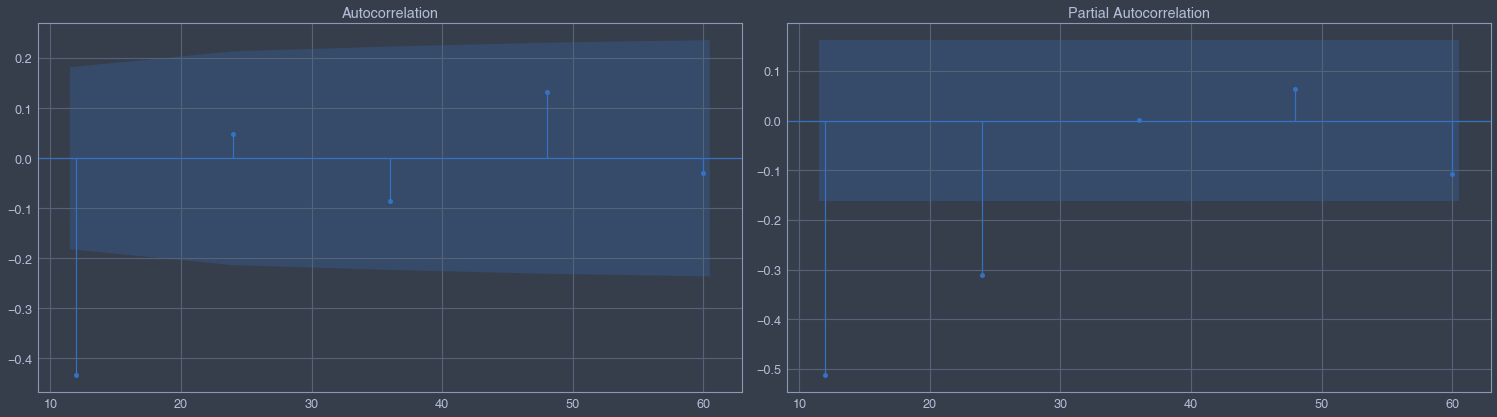

In [7]:
lags = [12, 24, 36, 48, 60]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 6))
plot_acf(aus_employment_diff, lags=lags, zero=False, ax=ax1);
plot_pacf(aus_employment_diff, lags=lags, zero=False, ax=ax2);
plt.tight_layout();